<a href="https://colab.research.google.com/github/bigdog3626/MINST_Classification/blob/main/MNST_Classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 MNST Classification with Deep Learning
## Dylan Meyer, 01/19/2023, ECSE4420

In [ ]:
# import necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
color_pal = sns.color_palette()
%matplotlib inline

Fetch MNST Dataset

In [ ]:
%%time
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=True
)

CPU times: total: 1min 12s
Wall time: 1min 12s


In [ ]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [ ]:
y.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [ ]:
X.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

In [ ]:
y.describe()

count     70000
unique       10
top           1
freq       7877
Name: class, dtype: object

In [ ]:
# Create train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
X_train.shape

(52500, 784)

In [ ]:
X_test.shape

(17500, 784)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# Modified Source: https://www.tensorflow.org/datasets/keras_example#step_2_create_and_train_the_model
# Barebones Tensorflow modeling no preprocessing going to compare results later
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256, validation_split=0.15
)


Epoch 1/100
175/175 [==============================] - 2s 6ms/step - loss: 6.1364 - accuracy: 0.1892 - val_loss: 2.0070 - val_accuracy: 0.2319
Epoch 2/100
175/175 [==============================] - 1s 5ms/step - loss: 2.0303 - accuracy: 0.2489 - val_loss: 1.8856 - val_accuracy: 0.2809
Epoch 3/100
175/175 [==============================] - 1s 5ms/step - loss: 1.8128 - accuracy: 0.3436 - val_loss: 1.5326 - val_accuracy: 0.4185
Epoch 4/100
175/175 [==============================] - 1s 6ms/step - loss: 1.6221 - accuracy: 0.4045 - val_loss: 1.4344 - val_accuracy: 0.4461
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 1.5184 - accuracy: 0.4313 - val_loss: 1.3633 - val_accuracy: 0.4756
Epoch 6/100
175/175 [==============================] - 1s 5ms/step - loss: 1.4223 - accuracy: 0.4628 - val_loss: 1.2722 - val_accuracy: 0.5036
Epoch 7/100
175/175 [==============================] - 1s 5ms/step - loss: 1.2300 - accuracy: 0.5678 - val_loss: 0.8666 - val_accuracy: 0.7053

In [ ]:
y_pred = model.predict(X_test)

547/547 [==============================] - 1s 2ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

Best Accuracy:  0.9911484718322754
Lowest Loss:  0.03536110743880272


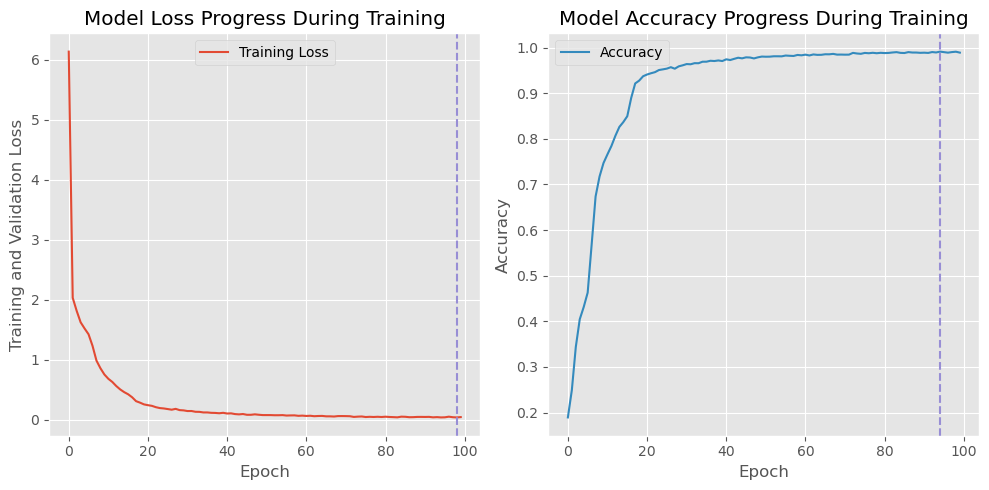

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(history.history['loss'], color= color_pal[0])
min_loss_x = history.history['loss'].index(min(history.history['loss']))
ax[0].axvline(x=min_loss_x, color=color_pal[2], linestyle='--')
ax[0].set_title('Model Loss Progress During Training')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Training and Validation Loss')
ax[0].legend(['Training Loss'])
ax[1].plot(history.history['accuracy'],  color= color_pal[1])
max_acc_x = history.history['accuracy'].index(max(history.history['accuracy']))
ax[1].axvline(x=max_acc_x, color=color_pal[2], linestyle='--')
ax[1].set_title('Model Accuracy Progress During Training')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['Accuracy'])
fig.tight_layout()
print('Best Accuracy: ', max(history.history['accuracy']))
print('Lowest Loss: ', min(history.history['loss']))

Text(0.5, 1.0, 'Basic 5 layer NN')

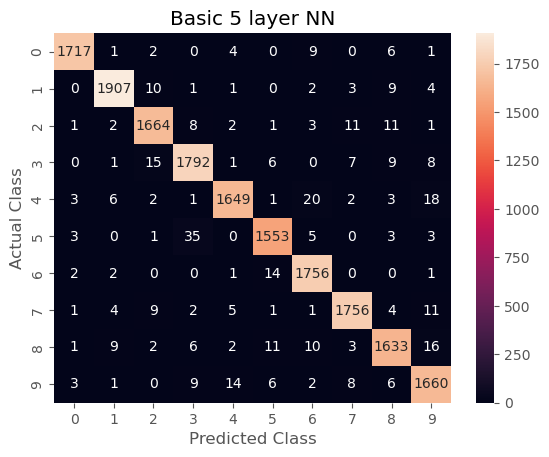

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Compute confusion matrix
seven_layer_deep = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(seven_layer_deep, annot=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Basic 5 layer NN')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1740
           1       0.99      0.98      0.99      1937
           2       0.98      0.98      0.98      1704
           3       0.97      0.97      0.97      1839
           4       0.98      0.97      0.97      1705
           5       0.97      0.97      0.97      1603
           6       0.97      0.99      0.98      1776
           7       0.98      0.98      0.98      1794
           8       0.97      0.96      0.97      1693
           9       0.96      0.97      0.97      1709

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [ ]:
from sklearn import set_config

set_config(display='diagram')

### Modeling with Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [ ]:



# Label encode targets for Categorical Classification via tensorflow
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



# Define Classifier
clf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])
clf.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)


# Create the Pipeline
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('clf', clf)])
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 <keras.engine.sequential.Sequential object at 0x0000029A2EC00F10>)])

In [ ]:
pipe.fit(X_train, y_train, clf__epochs=100,
    clf__batch_size=256, clf__validation_split=0.15)

Epoch 1/100
175/175 [==============================] - 1s 5ms/step - loss: 0.6552 - accuracy: 0.8016 - val_loss: 0.2410 - val_accuracy: 0.9275
Epoch 2/100
175/175 [==============================] - 1s 5ms/step - loss: 0.2919 - accuracy: 0.9186 - val_loss: 0.1865 - val_accuracy: 0.9458
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2217 - accuracy: 0.9364 - val_loss: 0.1689 - val_accuracy: 0.9507
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.1880 - accuracy: 0.9462 - val_loss: 0.1517 - val_accuracy: 0.9572
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.1587 - accuracy: 0.9542 - val_loss: 0.1411 - val_accuracy: 0.9595
Epoch 6/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1399 - accuracy: 0.9598 - val_loss: 0.1376 - val_accuracy: 0.9606
Epoch 7/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1224 - accuracy: 0.9644 - val_loss: 0.1275 - val_accuracy: 0.9671

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 <keras.engine.sequential.Sequential object at 0x0000029A2EC00F10>)])

In [ ]:

history = pipe[-1].history.history

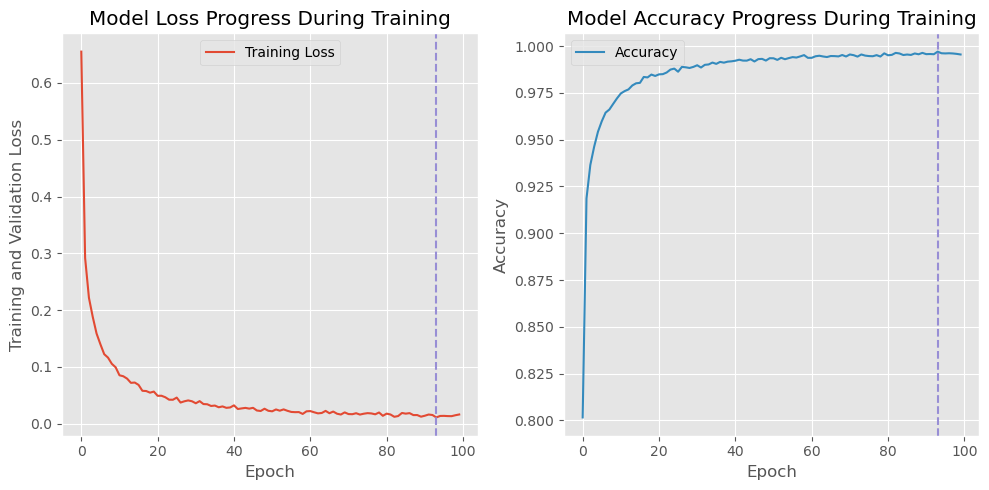

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(history['loss'], color= color_pal[0])
min_loss_x = history['loss'].index(min(history['loss']))
ax[0].axvline(x=min_loss_x, color=color_pal[2], linestyle='--')
ax[0].set_title('Model Loss Progress During Training')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Training and Validation Loss')
ax[0].legend(['Training Loss'])
ax[1].plot(history['accuracy'],  color= color_pal[1])
max_acc_x = history['accuracy'].index(max(history['accuracy']))
ax[1].axvline(x=max_acc_x, color=color_pal[2], linestyle='--')
ax[1].set_title('Model Accuracy Progress During Training')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['Accuracy'])
fig.tight_layout()

In [ ]:
print('Best Accuracy: ', max(history['accuracy']))
print('Lowest Loss: ', min(history['loss']))

Best Accuracy:  0.9970420002937317
Lowest Loss:  0.010928768664598465


In [ ]:
y_pred = pipe.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

547/547 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Preprocessed 7 layer Deep Neural Net')

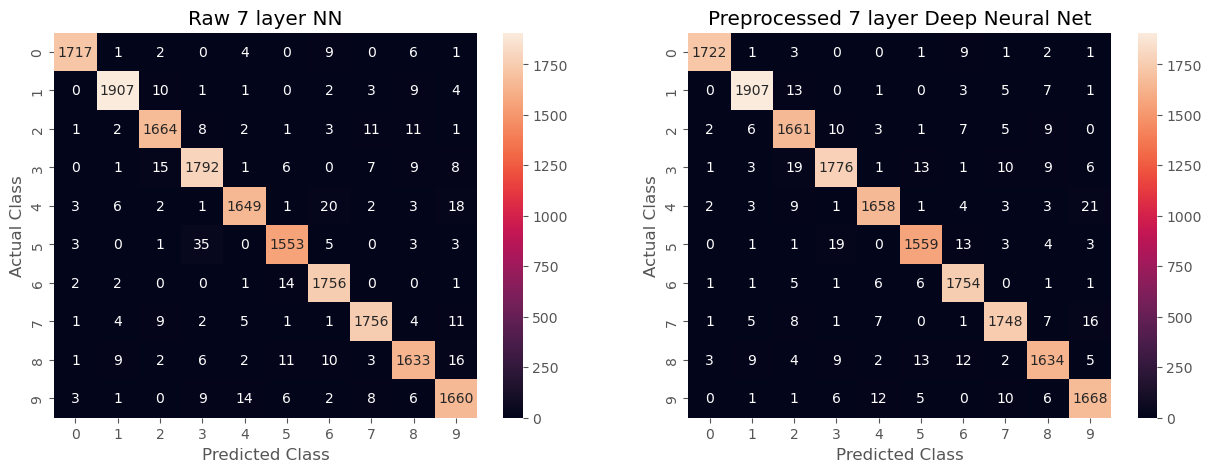

In [ ]:


conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.heatmap(seven_layer_deep, annot=True, fmt='d', ax=ax[0])
ax[0].set_xlabel('Predicted Class')
ax[0].set_ylabel('Actual Class')
ax[0].set_title('Raw 7 layer NN')


# Create heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax[1])
ax[1].set_xlabel('Predicted Class')
ax[1].set_ylabel('Actual Class')
ax[1].set_title('Preprocessed 7 layer Deep Neural Net')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1740
           1       0.98      0.98      0.98      1937
           2       0.96      0.97      0.97      1704
           3       0.97      0.97      0.97      1839
           4       0.98      0.97      0.98      1705
           5       0.97      0.97      0.97      1603
           6       0.97      0.99      0.98      1776
           7       0.98      0.97      0.98      1794
           8       0.97      0.97      0.97      1693
           9       0.97      0.98      0.97      1709

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500

